Problem Statement: Given is a 2D adjacency list representation of a directed graph. Check whether the graph has cycles are not.

Example:

Input:
Graph= {
         0 -> 1
         1 -> 2, 5
         2 -> 3
         3 -> 4
         4 -> 0, 1
         5 -> null
       }

Output: Cycle detected

Explanation: The input graph is basically represented by an adjacency list. Each index denotes a vertex in the graph and also has a list of vertices, with which the index vertex is connected. Refer to the picture below.

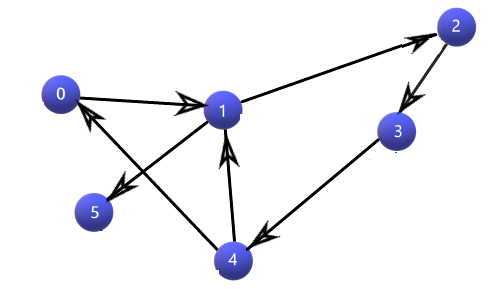

Solution 1:

Intuition:

A cycle involves at least 2 nodes. The basic intuition for cycle detection is to check whether a node is reachable when we are processing its neighbors and also its neighbors’ neighbors, and so on. Let’s take the cycle in Example 2 : 0 -> 1 -> 2 -> 3 - > 4 -> 0.

We can see that 0 is reachable through 1, 2, 3, and 4. We can use the normal DFS traversal with some modifications to check for cycles.

**Approach**:

Usually, we need a separate array for DFS traversal, which has information on whether a particular node has been visited or not. For this cycle detection, we need one more array which has information on whether we are exploring one’s neighbor or not. That is, for example in Example 2, in DFS, we go from Nodes 0 to 1 to 2. Only when we are finished visiting node 2’s neighbors, we can visit node 1’s other neighbors. Also, only when we are finished visiting node 1’s neighbors, we can go to other neighbors of 0. Within that time if any neighbors of nodes 1 and 2, has an edge to 0, then we can say that there is a cycle. So, we need a second array to tell whether, at any point in time, we are processing a node’s neighbors. Once we finished processing the node’s neighbors, we can update the array.

So, in our algorithm, we are starting with node 0. This is an important step. Before going through its neighbors, we have to first set 1 to its index in the visited array. And then we have set 1 to the index in the special array(in this case: dfsVis[]), which just says that we going to process its neighbors. As we do for DFS traversal, we check whether we have already visited a node (which is currently a neighbor of another node). If it is already visited (this is the heart of this algorithm), then we check whether we are processing its neighbors (by checking dfsVis []). If so, then yes, we have found a cycle. Because, we haven’t finished processing the node’s neighbor (variable “node’s” neighbor, variable “neighbor”), but we found an edge from the variable node to a variable neighbor. There is also another important thing to do. After traversing a node’s neighbors, we should inform the dfsVis array, by setting it to 0, which means we have finished processing its neighbors.

That is our whole algorithm. If our function returns true, then we have a cycle, if it returns false, then we don’t have any cycle.



In [ ]:
class Solution:
    def checkCycle(self, node, adj, vis, dfsVis):
        vis[node] = 1
        dfsVis[node] = 1

        for neighbor in adj[node]:
            if not vis[neighbor]:
                if self.checkCycle(neighbor, adj, vis, dfsVis):
                    return True
            elif dfsVis[neighbor]:
                return True

        dfsVis[node] = 0
        return False

    def isCyclic(self, N, adj):
        vis = [0] * N
        dfsVis = [0] * N

        for i in range(N):
            if not vis[i]:
                if self.checkCycle(i, adj, vis, dfsVis):
                    return True
        return False

# Testing the code
if __name__ == "__main__":
    V = 6
    graph = [[] for _ in range(V)]

    # Vertex - 0
    neighbors = [1]
    graph[0] = neighbors

    # Vertex - 1
    neighbors = [2, 5]
    graph[1] = neighbors

    # Vertex - 2
    neighbors = [3]
    graph[2] = neighbors

    # Vertex - 3
    neighbors = [4]
    graph[3] = neighbors

    # Vertex - 4
    neighbors = [0, 1]
    graph[4] = neighbors

    # Vertex - 5
    neighbors = []
    graph[5] = neighbors

    solution = Solution()
    if solution.isCyclic(V, graph):
        print("Cycle detected")
    else:
        print("No cycles detected")
